# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 10)})
import warnings
warnings.filterwarnings('ignore')
import random

In [8]:
random.seed(10)

# Loading Data

In [9]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
dict_live = {
    0:"Died",
    1:'Survived'
}

dict_sex = {
    'male': 0,
    'female': 1
}
data['Bsex'] = data['Sex'].apply(lambda x: dict_sex[x])


features = data[['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

# Splitting the dataset

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=5)

In [51]:
x_train

array([[1, 1],
       [2, 1],
       [3, 1],
       ...,
       [1, 0],
       [3, 0],
       [1, 0]], dtype=int64)

# MultiLayer Perceptron

## Preparing Functions

In [52]:
def sigmoid(x, derivative = False):
    if(derivative==True):
        f = 1/(1+np.exp(-x)) * (1 - 1/(1+np.exp(-x)))
    else:
        f = 1/(1+np.exp(-x))
    return f

def ReLu(x, derivative = False):
    if(derivative==True):
        f = np.heaviside(x, 1)
    else:
        f = np.maximum(0, x)
    return f

## Training Model

In [53]:
def train_ANN(x_train, y_train, h1_units = 4, h2_units = 4, learning_rate = 0.001):
    random.seed(10)
    w1 = 2*np.random.rand(h1_units, x_train.shape[1])
    b1 = np.random.rand(h1_units)
    
    w2 = 2*np.random.rand(h2_units, h1_units)
    b2 = np.random.rand(h2_units)
    
    w_out = 2*np.random.rand(h2_units)
    b_out = np.random.rand(1)
    
    loss = []
    vec_y = []
    
    for i in range(x_train.shape[0]):
        x_data = x_train[i]
        
        h1 = ReLu(np.dot(w1, x_data) + b1)
        h2 = ReLu(np.dot(w2, h1) + b2)
        y = sigmoid(np.dot(w_out, h2) + b_out) # Beacuse classification, therefore sigmoid function
        
        delta_out = (y-y_train[i])*sigmoid(y, derivative=True)
        delta_2 = delta_out*w_out*ReLu(h2, derivative=True)
        delta1 = np.dot(delta_2, w2)*ReLu(h1, derivative=True)
        
        w_out = w_out - learning_rate*delta_out*h2
        b_out = b_out - learning_rate*delta_out
        
        w2 = w2 - learning_rate*np.kron(delta_2, h1).reshape(h2_units, h1_units)
        b2 = b2 - learning_rate*delta_2
        
        w1 = w1 - learning_rate*np.kron(delta1, x_data).reshape(h1_units, x_data.shape[0])
        b1 = b1 - learning_rate*delta1
        
        loss.append((1/2)*(y - y_train[i])**2)
        vec_y.append(y[0])
        
    batch_loss = []
    for i in range(10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg += vec_y[60*i + m]/60
        batch_loss.append(loss_avg)
        
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(batch_loss)+1), batch_loss)
    plt.title('Average loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, w_out, b_out, loss

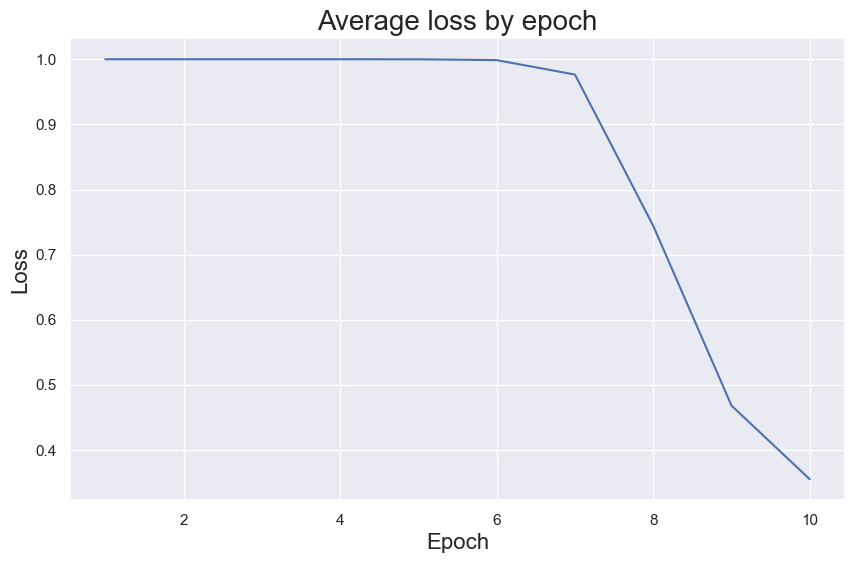

In [54]:
w1, b1, w2, b2, w_out, b_out, loss = train_ANN(x_train, y_train)

# Testing Model

In [61]:
def ANN_pred(x_test, w1, b1, w2, b2, w_out, b_out):
    pred = []
    for i in range(x_test.shape[0]):
        x = x_test[i]
        z1 = ReLu(np.dot(w1, x) + b1)
        z2 = ReLu(np.dot(w2, z1) + b2)
        y = sigmoid(np.dot(w_out, z2) + b_out) # Beacuse classification, therefore sigmoid function
        
        pred.append(np.heaviside(y-0.5, 1)[0])
    return np.array(pred)

In [62]:
predictions = ANN_pred(x_test, w1, b1, w2, b2, w_out, b_out)

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.7206703910614525
